## Extending bag-of-words with TF-IDF weights

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print (vectorizer.vocabulary_)

[[2 1 3 1 1]]
{'dog': 1, 'sandwich': 2, 'ate': 0, 'wizard': 4, 'transfigured': 3}


In [5]:
# use TfidfVectorizer to create TF-IDF weighted feature vectors for the corpus

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'The dog ate a sandwich and I ate a sandwich',
  'The wizard transfigured a sandwich'
]

vectorizer = TfidfVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print (vectorizer.vocabulary_)

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{'dog': 1, 'sandwich': 2, 'ate': 0, 'wizard': 4, 'transfigured': 3}


## Space-effcient feature vectorizing with the hashing trick

In previous examples, a dictionary containing all of the corpus's unique tokens is used to map a document's tokens to the elements of a feature vector.

Two drawbacks. 

1. Two passes are required over the corpus: the first pass is used to create the dictionary and the second pass is used to create feature vectors for the documents. 

2. The dictionary must be stored in memory, which could be prohibitive for large corpora. 

It is possible to avoid creating this dictionary through applying a hash function to the token to determine its index in the feature vector directly. This shortcut is called the hashing trick.

In [6]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features=6)
print (vectorizer.transform(corpus).todense())

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


# Extracting features from images

## Extracting features from pixel intensities

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


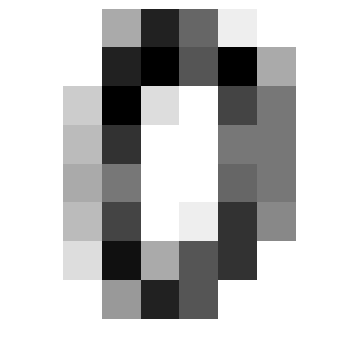

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
print ('Digit:', digits.target[0])
print (digits.images[0])
plt.figure()
plt.axis('off')
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Extracting points of interest as features

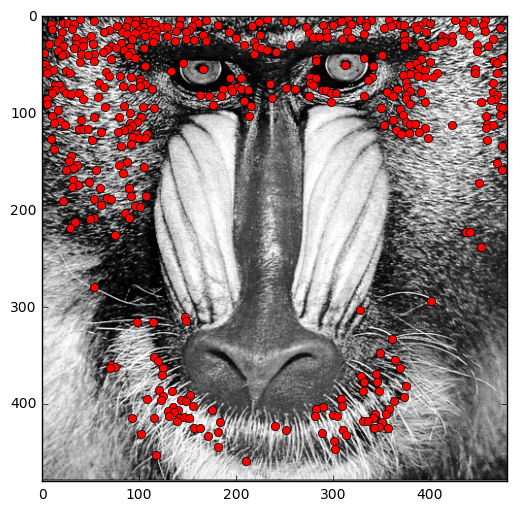

In [14]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

mandrill = io.imread('mandrill.png')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)

In [17]:
from sklearn import preprocessing
import numpy as np
X = np.array([
  [0., 0., 5., 13., 9., 1.],
  [0., 0., 13., 15., 10., 15.],
  [0., 3., 15., 2., 0., 11.]
])
print (preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]
